In [16]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

In [18]:
df = pd.read_csv("TimeSeriesData.csv", index_col=0, encoding='gbk')
df

,股票A,股票B
date,,
2012-1-1,76.985291,40.301222
2012-2-1,71.506866,33.981832
2012-3-1,57.410031,51.475666
2012-4-1,56.485801,41.560597
2012-5-1,39.225449,27.668570
...,...,...
2021-10-1,141.698789,199.537386
2021-11-1,149.804607,215.963365
2021-12-1,143.574939,223.464030


In [19]:
df.index

Index(['2012-1-1', '2012-2-1', '2012-3-1', '2012-4-1', '2012-5-1', '2012-6-1',
       '2012-7-1', '2012-8-1', '2012-9-1', '2012-10-1',
       ...
       '2021-5-1', '2021-6-1', '2021-7-1', '2021-8-1', '2021-9-1', '2021-10-1',
       '2021-11-1', '2021-12-1', '2022-1-1', '2022-2-1'],
      dtype='object', name='date', length=122)

In [20]:
print(type(df.index[0]))

<class 'str'>


In [21]:
data_1,data_2 = df.columns[0],df.columns[1]
print(data_1,data_2)

股票A 股票B


In [22]:
x = df.index
y1 = df[data_1]
y2 = df[data_2]

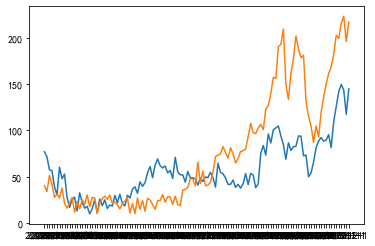

In [23]:
# 直接画图
fig = plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [24]:
df.index[0]

'2012-1-1'

In [25]:
df.index = [datetime.strptime(d, "%Y-%m-%d").date() for d in df.index]
df.index[0]

datetime.date(2012, 1, 1)

In [26]:
x = df.index
y1 = df[data_1]
y2 = df[data_2]

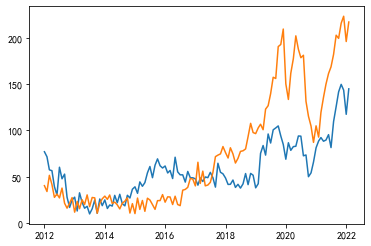

In [27]:
# 折线图
fig = plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

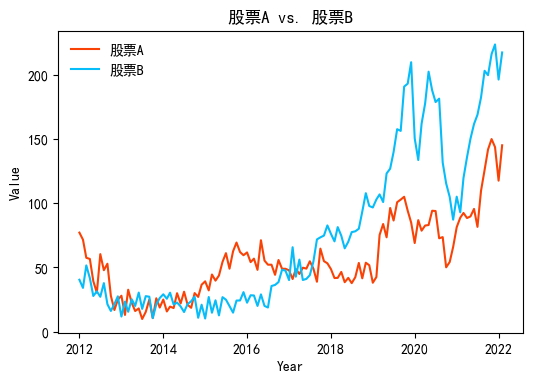

In [28]:
# 丰富细节
fig = plt.figure(dpi=100)
plt.plot(x, y1, color="#F94306", label=data_1)
plt.plot(x, y2, color="#06BCF9", label=data_2)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title(f"{data_1} vs. {data_2}")
plt.legend(loc="upper left", edgecolor="none", facecolor="none")

plt.show()
# plt.savefig("折线图.png")
# plt.close()

In [29]:
# 面积图
fig = plt.figure(figsize=(10, 8), dpi=350)
colors = ["#F94306", "#06BCF9"]
plt.fill_between(
    df.index.values,
    y1=df[data_1].values,
    y2=0,
    label=df.columns[1],
    alpha=0.6,
    facecolor=colors[0],
    linewidth=1,
    edgecolor="k",
)
plt.fill_between(
    df.index.values,
    y1=df[data_2].values,
    y2=0,
    label=df.columns[0],
    alpha=0.6,
    facecolor=colors[1],
    linewidth=1,
    edgecolor="k",
)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title(f"{data_1} vs. {data_2}")
plt.legend(loc="upper left", edgecolor="none", facecolor="none")
# plt.show()
plt.savefig("面积图.png")
plt.close()

In [30]:
# 夹层填充面积图
df["ymin"] = df[[data_1, data_2]].apply(lambda x: x.min(), axis=1)
df["ymax"] = df[[data_1, data_2]].apply(lambda x: x.max(), axis=1)
df

,股票A,股票B,ymin,ymax
2012-01-01,76.985291,40.301222,40.301222,76.985291
2012-02-01,71.506866,33.981832,33.981832,71.506866
2012-03-01,57.410031,51.475666,51.475666,57.410031
2012-04-01,56.485801,41.560597,41.560597,56.485801
2012-05-01,39.225449,27.668570,27.668570,39.225449
...,...,...,...,...
2021-10-01,141.698789,199.537386,141.698789,199.537386
2021-11-01,149.804607,215.963365,149.804607,215.963365
2021-12-01,143.574939,223.464030,143.574939,223.464030
2022-01-01,117.443904,196.151518,117.443904,196.151518


In [31]:
fig = plt.figure(figsize=(10, 8), dpi=350)
plt.fill_between(
    df.index.values,
    y1=df.ymax.values,
    y2=df.ymin.values,
    alpha=0.15,
    facecolor="black",
    linewidth=1,
    edgecolor="k",
)
plt.plot(df.index, df[data_1], color="#F94306", label=data_1)
plt.plot(df.index, df[data_2], color="#06BCF9", label=data_2)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title(f"{data_1} vs. {data_2}")
plt.legend(loc="upper left", edgecolor="none", facecolor="none")

# plt.show()
plt.savefig("夹层填充面积图.png")
plt.close()
